In [35]:
%load_ext autoreload
%autoreload 2
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import os
import sys
import json
import random
module_path = os.path.abspath(os.path.join('../src')) # or the path to your source code
sys.path.insert(0, module_path)
import pandas
from query import query_cdp_data as query
from enrich import enrich_cdp_data as enrich
from ingest_bulk import ingest_cdp_data_bulk as ingest_bulk
from ingest_stream import ingest_cdp_data_stream as ingest_stream

In [30]:
# update following
event = {}
event['login_url'] = 'https://login.salesforce.com' 
event['user_name'] = '' #CDP org's username
event['password'] = '' #CDP org's password
event['client_id'] = '' #CDP org's connected app client id
event['client_secret'] = '' #CDP org's connected app client secret
event['dlo_name'] = 'athlete_profiles' #CDP org's DLO name
event['dlo_source_name'] = 'athlete_api' #CDP org's Ingestion API source name 
event['dlo_object'] = 'athlete_api_athlete_profiles_E6B17A31__dll' #DLO object name to be queried
event['dlo_filter'] = 'limit 100000' #Where clause for the query
event['bulk_operation_type'] = 'upsert' #Where clause for the query

In [36]:
#First load test data using streaming API
state = ["NY", "TX", "CT", "CA"]
athletes = []
athletes_insert_count = 5
for c in range(1, athletes_insert_count):
    i = random.randrange(100, 10000, 3)
    fname = f"fname-{i}"
    lname = f"lname-{i}"
    email = f"test-{i}@demp.cdp"
    
    a = {
    "maid":1010,
    "first_name":fname,
    "last_name":lname,
    "email":email,
    "gender":"Male",
    "city":"austin",
    "state":random.choice(state),
    "created":"2021-10-07T09:11:11.816319Z"
    }
    athletes.append(a)

ingest_stream(event, athletes)

***ingest_cdp_data_stream start
got connection
url=https://m04tszrqg-yw09jsmmydcyrzg4.c360a.salesforce.com/api/v1/ingest/sources/athlete_api/athlete_profiles
Submitting query for execution
{'accepted': True}
{'accepted': True}
ingest_cdp_data_stream complete


In [37]:
# Query DLO. # It can take 10 to 30 minutes for data to show up. Make sure to wait before you proceed to next step
df = query(event)
print(len(df))
df.head()

*** query_cdp_data start
got CDP connection
Query results took 0:00:03.989997 time, for total records 100000
*** query_cdp_data end
100000


,email__c,first_name__c,datasource__c,city__c,datasourceobject__c,maid__c,state__c,gender__c,created__c,score__c,last_name__c,date_id
0,patl,1010,athlete_api_846862a0_bc08_4018_a28b_910b7338dbf2,male,athlete_api_athlete_profiles_E6B17A31,0E-18,sgn,aaa@coms.cooo,None,None,kamle,2022-10-17 22:22:26.628 UTC
1,customer-945881@test.cdpdata,fname-945881,athlete_api_846862a0_bc08_4018_a28b_910b7338dbf2,austin,athlete_api_athlete_profiles_E6B17A31,945881.000000000000000000,TX,Male,None,None,lname-945881,2022-10-18 18:20:54.472 UTC
2,customer-945902@test.cdpdata,fname-945902,athlete_api_846862a0_bc08_4018_a28b_910b7338dbf2,austin,athlete_api_athlete_profiles_E6B17A31,945902.000000000000000000,TX,Male,None,None,lname-945902,2022-10-18 18:20:54.472 UTC
3,customer-945911@test.cdpdata,fname-945911,athlete_api_846862a0_bc08_4018_a28b_910b7338dbf2,austin,athlete_api_athlete_profiles_E6B17A31,945911.000000000000000000,TX,Male,None,None,lname-945911,2022-10-18 18:20:54.472 UTC
4,customer-945913@test.cdpdata,fname-945913,athlete_api_846862a0_bc08_4018_a28b_910b7338dbf2,austin,athlete_api_athlete_profiles_E6B17A31,945913.000000000000000000,TX,Male,None,None,lname-945913,2022-10-18 18:20:54.472 UTC


In [39]:
# Enrich DLO
df = enrich(df)

*** enrich_cdp_data start
Query exception: "['datasourceobject__c' 'datasource__c'] not found in axis"


KeyError: "['datasourceobject__c' 'datasource__c'] not found in axis"

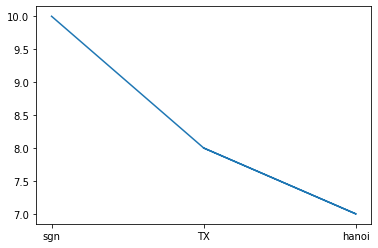

In [40]:
# Visualize enriched data
from matplotlib import pyplot as plt
plt.plot(df["state__c"], df["score"])
plt.show()

In [41]:
# Bulk update Enriched DLO
ingest_bulk(event,df)

***ingest_cdp_data_bulk start
got connection
m04tszrqg-yw09jsmmydcyrzg4.c360a.salesforce.com
Posting to https://m04tszrqg-yw09jsmmydcyrzg4.c360a.salesforce.com/api/v1/ingest/jobs/
Open job id 5ae297cf-e6c8-41b2-aec3-0bd51f6f1856
Found an open job so can not start another bulk job right now!
ingest_cdp_data_bulk exception: Found an open job so can not start another bulk job right now!


Exception: Found an open job so can not start another bulk job right now!

In [ ]:
df.head()